In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Untuk dataset IMDb
import tensorflow_datasets as tfds

In [2]:
# Load dataset
dataset = tfds.load('imdb_reviews', as_supervised=True)

# Ekstrak data train dan test
train_data, test_data = dataset['train'], dataset['test']

# Konversi ke pandas DataFrame
def dataset_to_dataframe(dataset):
    texts = []
    labels = []
    for text, label in tfds.as_numpy(dataset):
        texts.append(text.decode('utf-8'))
        labels.append(label)
    return pd.DataFrame({'text': texts, 'label': labels})

train_df = dataset_to_dataframe(train_data)
test_df = dataset_to_dataframe(test_data)

# Gabungkan train dan test untuk eksplorasi data
df = pd.concat([train_df, test_df], ignore_index=True)

print(f"Jumlah data: {len(df)}")
print(f"Distribusi label:\n{df['label'].value_counts()}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.ESO0QK_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.ESO0QK_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.ESO0QK_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Jumlah data: 50000
Distribusi label:
label
0    25000
1    25000
Name: count, dtype: int64


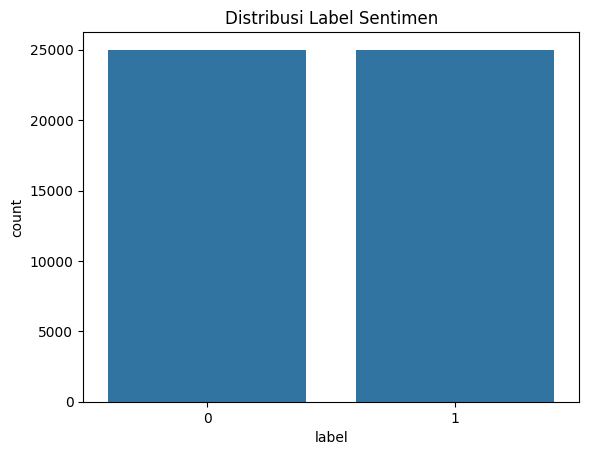

Contoh ulasan positif:
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.

Contoh ulasan negatif:
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was

In [3]:
# Distribusi label
sns.countplot(x='label', data=df)
plt.title('Distribusi Label Sentimen')
plt.show()

# Contoh teks positif
print("Contoh ulasan positif:")
print(df[df['label'] == 1]['text'].iloc[0])

# Contoh teks negatif
print("\nContoh ulasan negatif:")
print(df[df['label'] == 0]['text'].iloc[0])

In [5]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text, stemming=False):
    # Tokenisasi
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Hapus tanda baca dan karakter non-alphanumeric
    tokens = [token for token in tokens if token.isalpha()]

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming (opsional)
    if stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

# Contoh preprocessing
sample_text = df['text'].iloc[0]
print("Original text:", sample_text)
print("Preprocessed text:", preprocess_text(sample_text))

# Preprocessing seluruh dataset
df['cleaned_text'] = df['text'].apply(lambda x: preprocess_text(x, stemming=False))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original text: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Preprocessed text: absolutely terrible movie lured christopher walken michael ironside great actors must simply worst role history even great acting could redeem movie ridiculous storyline movie early nineties us propaganda piece pathetic scenes columbian rebels making cases

In [6]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (40000, 5000)
Shape of X_test: (10000, 5000)


In [7]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Model 2: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

Logistic Regression Performance:
Accuracy: 0.8847
Precision: 0.8765
Recall: 0.8946
F1-Score: 0.8854


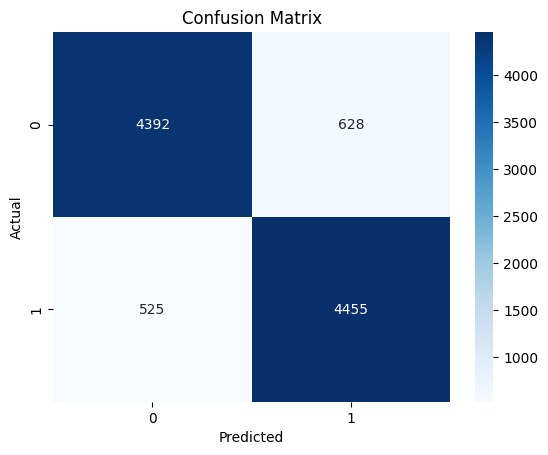


Naive Bayes Performance:
Accuracy: 0.8547
Precision: 0.8496
Recall: 0.8606
F1-Score: 0.8551


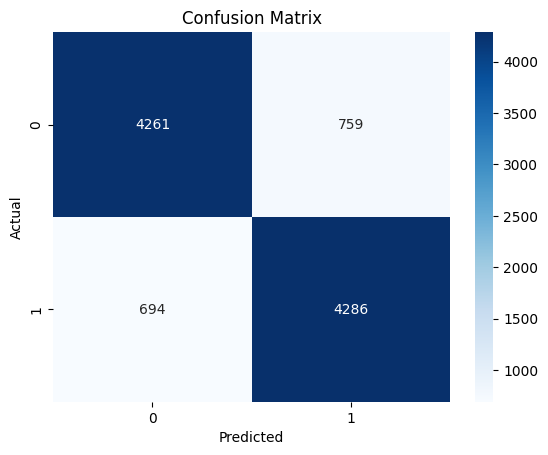

In [8]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Evaluasi Logistic Regression
print("Logistic Regression Performance:")
evaluate_model(lr_model, X_test, y_test)

# Evaluasi Naive Bayes
print("\nNaive Bayes Performance:")
evaluate_model(nb_model, X_test, y_test)

In [9]:
def predict_sentiment(text, model, vectorizer):
    # Preprocess teks
    cleaned_text = preprocess_text(text)
    # Transform ke TF-IDF
    text_vector = vectorizer.transform([cleaned_text])
    # Prediksi
    prediction = model.predict(text_vector)
    # Konversi ke label
    return "Positive" if prediction[0] == 1 else "Negative"

# Contoh teks baru
sample_texts = [
    "This movie was fantastic! I loved every minute of it.",
    "The plot was terrible and the acting was worse.",
    "It was okay, not great but not bad either."
]

for text in sample_texts:
    lr_pred = predict_sentiment(text, lr_model, tfidf_vectorizer)
    nb_pred = predict_sentiment(text, nb_model, tfidf_vectorizer)
    print(f"\nText: {text}")
    print(f"LR Prediction: {lr_pred}")
    print(f"NB Prediction: {nb_pred}")


Text: This movie was fantastic! I loved every minute of it.
LR Prediction: Positive
NB Prediction: Positive

Text: The plot was terrible and the acting was worse.
LR Prediction: Negative
NB Prediction: Negative

Text: It was okay, not great but not bad either.
LR Prediction: Negative
NB Prediction: Negative
